# Employee Attrition Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Note que o número de valores não nulos em todas as colunas do df é igual ao número de linhas apontado por df.shape - ou seja - o dataset não possui valores nulos pelas colunas.

Um grande problema que eu enxergo é a quantidade enorme de colunas. Isso pode complicar qualquer tipo de análise. Talvez e precise lidar com isso primeiro selecionando as features mais importantes com Lasso Regression.

In [4]:
# Discretizando variáveis não numéricas
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int8 
 2   BusinessTravel            1470 non-null   int8 
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int8 
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int8 
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int8 
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [6]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [7]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [8]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [9]:
df['Over18'].value_counts()

0    1470
Name: Over18, dtype: int64

Todas as variáveis acima não dizem muito. Elas são as mesmas para todos os registros, portanto não tem como serem "importantes" para a previsão de algo.

In [10]:
df = df.drop(labels=["EmployeeCount", "StandardHours", "Over18"], axis="columns")

In [11]:
# Checando se existem duplicatas em EmployeeNumber
df.groupby(df['EmployeeNumber']).size().sum()

1470

EmployeeNumber aparenta ser um id de funcionário.

In [12]:
df.index = df['EmployeeNumber']

In [13]:
df = df.drop(labels=["EmployeeNumber"], axis="columns")

Os dados estão bastante desbalanceados:

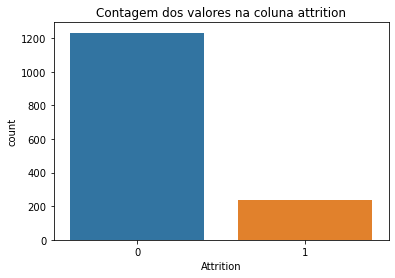

In [14]:
plt.title("Contagem dos valores na coluna attrition")
sns.countplot(x='Attrition', data=df)
plt.show()

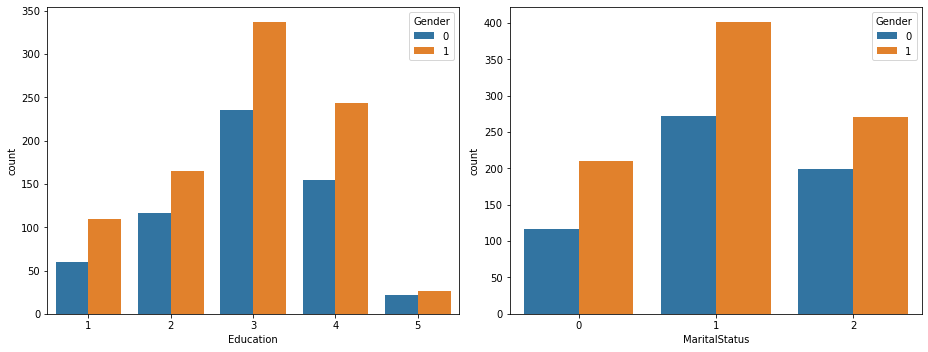

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(x='Education', hue='Gender', data=df, ax=ax[0])

sns.countplot(x='MaritalStatus', hue='Gender', data=df, ax=ax[1])

fig.tight_layout()
plt.show()

In [16]:
column_titles = list(df.columns)
column_titles[0], column_titles[1] = column_titles[1], column_titles[0]

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,1,41,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
2,0,49,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
4,1,37,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
5,0,33,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
7,0,27,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,0,36,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
2062,0,39,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
2064,0,27,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3


In [17]:
df = df[column_titles]

In [42]:
# separando em conjuntos de treino e teste
from sklearn.model_selection import train_test_split


X, Y = df[list(df.columns)[1:]], df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)